In [49]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

/Users/maarten/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [26]:
#1 read csv file
#2 normalize registar names by removing non alpha chars
#3 create index on normalized name
#4 group by normalized names
#5 join all dataframes into single dataframe (join on normalized registrar name)

#1
dfRegistrarAllDomains = pd.read_csv('./data/registrar_domains_2014-2016.csv')
dfRegistrarAllDomains.registrarname.fillna('unknown', inplace=True)

dfRegistrarLegacyDomains = pd.read_csv('./data/registrar_legacy_domains_2014-2016.csv')
dfRegistrarLegacyDomains.registrarname.fillna('unknown', inplace=True)

dfRegistrarAPWGDomains = pd.read_csv('./data/domains-per-registrar-apwg_2014-2016.csv')
dfRegistrarAPWGDomains.registrarname.fillna('unknown', inplace=True)

dfRegistrarAPWGLegacyDomains = pd.read_csv('./data/domains-legacy-per-registrar-apwg-2014-2016.csv')
dfRegistrarAPWGLegacyDomains.registrarname.fillna('unknown', inplace=True)


#2
#1: remove company types and icann registrar ids
#2: only keep chars in a-z
regex = re.compile('\(.*\)|LLC|INC|LTD|CORP|gmbh|limited|[^a-zA-Z]',  re.IGNORECASE)

def normalizeRegistrar(df):
   for i, row in df.iterrows():
      registrar = row['registrarname']
      if not registrar:
         registrar = "unknown"
      else:
         registrar = registrar.lower()
        
      registrar = regex.sub('', registrar)
      df.ix[i, 'registrarname'] = registrar

normalizeRegistrar(dfRegistrarAllDomains)
normalizeRegistrar(dfRegistrarLegacyDomains)
normalizeRegistrar(dfRegistrarAPWGDomains)
normalizeRegistrar(dfRegistrarAPWGLegacyDomains)

#3
dfRegistrarAllDomains = dfRegistrarAllDomains.set_index(['registrarname'])
dfRegistrarLegacyDomains = dfRegistrarLegacyDomains.set_index(['registrarname'])
dfRegistrarAPWGDomains = dfRegistrarAPWGDomains.set_index(['registrarname'])
dfRegistrarAPWGLegacyDomains = dfRegistrarAPWGLegacyDomains.set_index(['registrarname'])

#4
dfRegistrarAllDomains = dfRegistrarAllDomains.groupby(dfRegistrarAllDomains.index).sum()
dfRegistrarAllDomains = dfRegistrarAllDomains.sort_values(by="domains", ascending=False)

dfRegistrarLegacyDomains = dfRegistrarLegacyDomains.groupby(dfRegistrarLegacyDomains.index).sum()
dfRegistrarLegacyDomains = dfRegistrarLegacyDomains.sort_values(by="domains", ascending=False)

dfRegistrarAPWGDomains = dfRegistrarAPWGDomains.groupby(dfRegistrarAPWGDomains.index).sum()
dfRegistrarAPWGDomains = dfRegistrarAPWGDomains.sort_values(by="domains", ascending=False)

dfRegistrarAPWGLegacyDomains = dfRegistrarAPWGLegacyDomains.groupby(dfRegistrarAPWGLegacyDomains.index).sum()
dfRegistrarAPWGLegacyDomains = dfRegistrarAPWGLegacyDomains.sort_values(by="domains", ascending=False)
    

In [1]:
dfRegistrarLegacyDomains[:10]

NameError: name 'dfRegistrarLegacyDomains' is not defined

In [28]:
dfCombined = dfRegistrarAllDomains
dfCombined['total_legacy'] = dfRegistrarLegacyDomains['domains']
dfCombined['total_newgtld'] = dfCombined['domains'] - dfCombined['total_legacy']
dfCombined['total_apwg'] = dfRegistrarAPWGDomains['domains']
dfCombined['legacy_apwg'] = dfRegistrarAPWGLegacyDomains['domains']
dfCombined['newgtld_apwg'] = dfCombined['total_apwg'] - dfCombined['legacy_apwg']
dfCombined['apwg_ratio'] = (dfCombined['total_apwg'] / dfCombined['domains'])*100
dfCombined['apwg_newgtld_ratio'] = (dfCombined['newgtld_apwg'] / dfCombined['total_apwg'])*100
dfCombined['apwg_newgtld_2_newgtld'] = (dfCombined['newgtld_apwg'] / dfCombined['total_newgtld'])*100
dfCombined['apwg_legacy_2_legacy'] = (dfCombined['legacy_apwg'] / dfCombined['total_legacy'])*100

In [29]:
dfCombined.sort_values(by='domains', inplace=True, ascending=False)

In [30]:
dfCombined[dfCombined["domains"] > 1000] [:10]

,domains,total_legacy,total_newgtld,total_apwg,legacy_apwg,newgtld_apwg,apwg_ratio,apwg_newgtld_ratio,apwg_newgtld_2_newgtld,apwg_legacy_2_legacy
registrarname,,,,,,,,,,
godaddycom,96163841,92556301.0,3607540.0,69300.0,69119.0,181.0,0.072065,0.261183,0.005017,0.074678
enom,22414261,21132886.0,1281375.0,27181.0,26644.0,537.0,0.121267,1.975645,0.041908,0.126078
tucowsdomains,14880041,14434946.0,445095.0,10360.0,10234.0,126.0,0.069623,1.216216,0.028309,0.070897
networksolutions,12127801,11349023.0,778778.0,6609.0,6594.0,15.0,0.054495,0.226963,0.001926,0.058102
pdrdbapublicdomainregistrycom,11678538,10356294.0,1322244.0,23443.0,23209.0,234.0,0.200736,0.998166,0.017697,0.224105
unknown,10535109,9523953.0,1011156.0,2279.0,2241.0,38.0,0.021632,1.667398,0.003758,0.023530
internetag,9391709,9007738.0,383971.0,3569.0,3546.0,23.0,0.038002,0.644438,0.005990,0.039366
hichinazhichengtechnology,8172424,8152751.0,19673.0,1728.0,1728.0,0.0,0.021144,0.000000,0.000000,0.021195
gmointernetdbaonamaecom,7963266,7442346.0,520920.0,1206.0,1077.0,129.0,0.015145,10.696517,0.024764,0.014471


In [31]:
# apwg domains / # all domains
dfCombined.sort_values(by='apwg_ratio', inplace=True, ascending=False)
dfCombined[dfCombined["domains"] > 1000][["domains","total_apwg", "apwg_ratio"]] [:10]

,domains,total_apwg,apwg_ratio
registrarname,,,
abughazalehintellectualpropertydbatagidomainscom,1453,25.0,1.720578
tecnologiadesarrolloymercadosderldecv,2027,30.0,1.480020
shinjirumscsdnbhd,16594,226.0,1.361938
rethemhosting,4087,55.0,1.345730
upperlink,4725,52.0,1.100529
netchinesecorasia,1043,8.0,0.767018
evoplus,193452,1177.0,0.608420
naugus,8676,50.0,0.576302
bottledomains,13833,74.0,0.534953


In [48]:
#apwg new gTLD domains / # all new gTLD domains 
dfCombined.sort_values(by='apwg_newgtld_2_newgtld', inplace=True, ascending=False)
dfCombined[dfCombined["total_newgtld"] > 1000][["total_newgtld", "newgtld_apwg", "apwg_newgtld_2_newgtld"]] [:10]

,total_newgtld,newgtld_apwg,apwg_newgtld_2_newgtld
registrarname,,,
evoplus,1692.0,40.0,2.364066
abnameisp,1854.0,9.0,0.485437
shanghaimeichengtechnologyinformationdevelopmentco,49805.0,115.0,0.230901
fbs,25309.0,55.0,0.217314
cvrumahwebindonesia,10635.0,23.0,0.216267
jiangsubangningsciencetechnologyco,186226.0,323.0,0.173445
eranetinternational,39600.0,61.0,0.154040
domain,153889.0,213.0,0.138411
webafrica,2430.0,3.0,0.123457


In [47]:
# apwg old gTLD domains / # all old gTLD domains 
dfCombined.sort_values(by='apwg_legacy_2_legacy', inplace=True, ascending=False)
dfCombined[dfCombined["total_legacy"] > 1000][["total_legacy","legacy_apwg", "apwg_legacy_2_legacy"]] [:10]  

,total_legacy,legacy_apwg,apwg_legacy_2_legacy
registrarname,,,
mindsandmachines,1163.0,116.0,9.974205
abughazalehintellectualpropertydbatagidomainscom,1453.0,25.0,1.720578
tecnologiadesarrolloymercadosderldecv,2027.0,30.0,1.480020
rethemhosting,3994.0,55.0,1.377066
shinjirumscsdnbhd,16594.0,226.0,1.361938
upperlink,4725.0,52.0,1.100529
netchinesecorasia,1043.0,8.0,0.767018
evoplus,191760.0,1137.0,0.592929
naugus,8676.0,50.0,0.576302


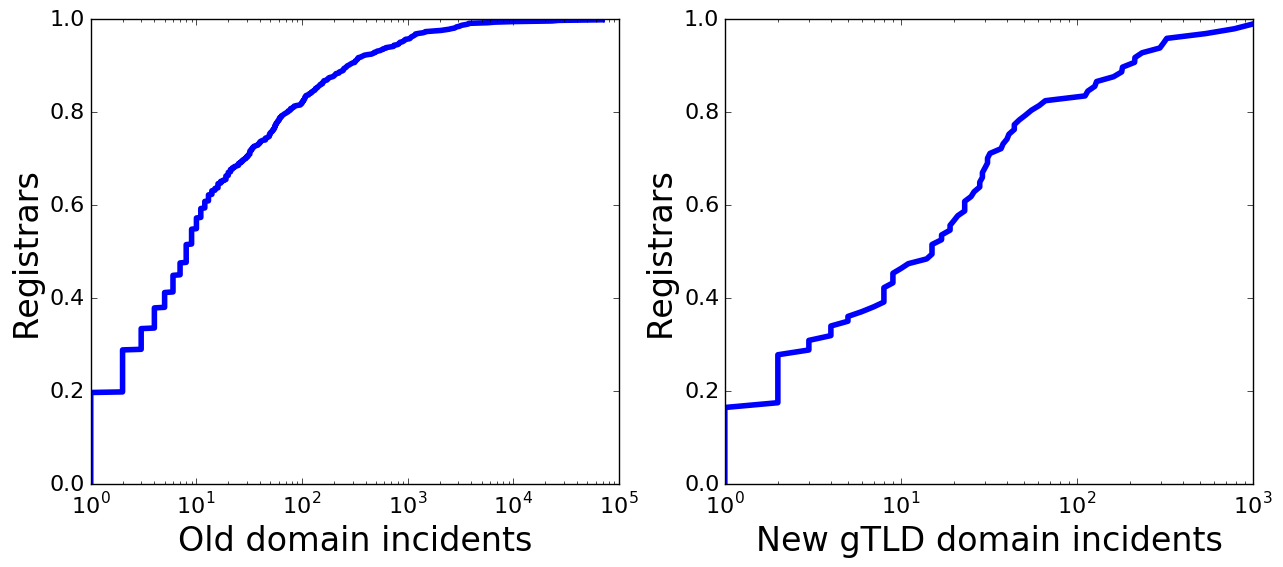

In [67]:
font = {'family' : 'Helvetica',
        'size'   : 16}

matplotlib.rc('font', **font)

SMALL_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

plt.figure(1)
fig = plt.figure(figsize=(15, 6), dpi=300)
ax = plt.subplot(121)
plt.xlabel('Old domain incidents',fontsize=24)
plt.ylabel('Registrars', fontsize=24)

#create cdf for all registrars with apwg legacy incidents
dfCombined.sort_values(by='legacy_apwg', inplace=True, ascending=True)
dfValues = dfCombined[dfCombined["legacy_apwg"] > 0][["legacy_apwg"]]
sorted = np.sort(dfValues.values)
yvals = np.arange(len(sorted))/float(len(sorted))
plt.xscale('log')
plt.plot(sorted, yvals, linewidth=4.0)

ax = plt.subplot(122)
plt.xlabel('New gTLD domain incidents', fontsize=24)
plt.ylabel('Registrars',fontsize=24)

#create cdf for all registrars with apwg legacy incidents
dfCombined.sort_values(by='newgtld_apwg', inplace=True, ascending=True)
dfValues = dfCombined[dfCombined["newgtld_apwg"] > 0][["newgtld_apwg"]]
sorted = np.sort(dfValues.values)
yvals = np.arange(len(sorted))/float(len(sorted))
plt.xscale('log')
plt.plot(sorted, yvals, linewidth=4.0)

plt.show()

fig.savefig('./APWG-incidents-ECDF.pdf')